In [1]:
import pandas as pd
import numpy as np


In [16]:
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('/content/Placement_Data_Full_Class (1).csv')

In [9]:
data.shape

(215, 14)

In [12]:
data.head(10)

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,Mkt&Fin,52.21,Not Placed,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [20]:
# Convert 'Placed'/'Not Placed' to binary
data['status_binary'] = data['status'].map({'Placed': 1, 'Not Placed': 0})

# Correlation with placement
correlations = data.corr(numeric_only=True)['status_binary'].sort_values(ascending=False)
print(correlations)

status_binary    1.000000
10th %           0.607889
12th %           0.491228
Degree %         0.479861
Mba %            0.076922
Sno             -0.026859
salary                NaN
Name: status_binary, dtype: float64


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Step 1: Copy and drop 'salary' only once
label_data = data.copy()
label_data = label_data.drop(columns=['salary'])

# Step 2: Encode categorical features
for col in label_data.select_dtypes(include='object'):
    label_data[col] = LabelEncoder().fit_transform(label_data[col])

# Step 3: Make sure there are no NaNs left
if label_data.isnull().sum().sum() > 0:
    print("Still has NaNs, filling them...")
    label_data = label_data.fillna(0)  # or use a smarter strategy if needed

# Step 4: Chi-square test
X = label_data.drop(columns=['status', 'status_binary'])
y = label_data['status_binary']
chi_scores, _ = chi2(X, y)

# Step 5: Display results
chi2_df = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print(chi2_df)


10th %            137.739258
12th %             92.449312
Degree %           40.204896
Work exp           10.745484
specialisation      7.539357
Sno                 5.532155
Mba %               0.691857
Gender              0.624805
SSC Board           0.161359
Degree stream       0.117084
12th Stream         0.058876
HSC Board           0.024118
dtype: float64


In [ ]:
data = data.drop(columns=['Mba %', 'Gender', 'Degree stream', 'SSC Board', 'HSC Board', '12th Stream', 'Sno','salary','specialisation'])

In [34]:
data.head()

,10th %,12th %,Degree %,Work exp,status
0,67.00,91.00,58.00,No,Placed
1,79.33,78.33,77.48,Yes,Placed
2,65.00,68.00,64.00,No,Placed
3,56.00,52.00,52.00,No,Not Placed
4,85.80,73.60,73.30,No,Placed


In [35]:
features = ['10th %', '12th %', 'Degree %', 'Work exp']
X = label_data[features]
y = label_data['status_binary']

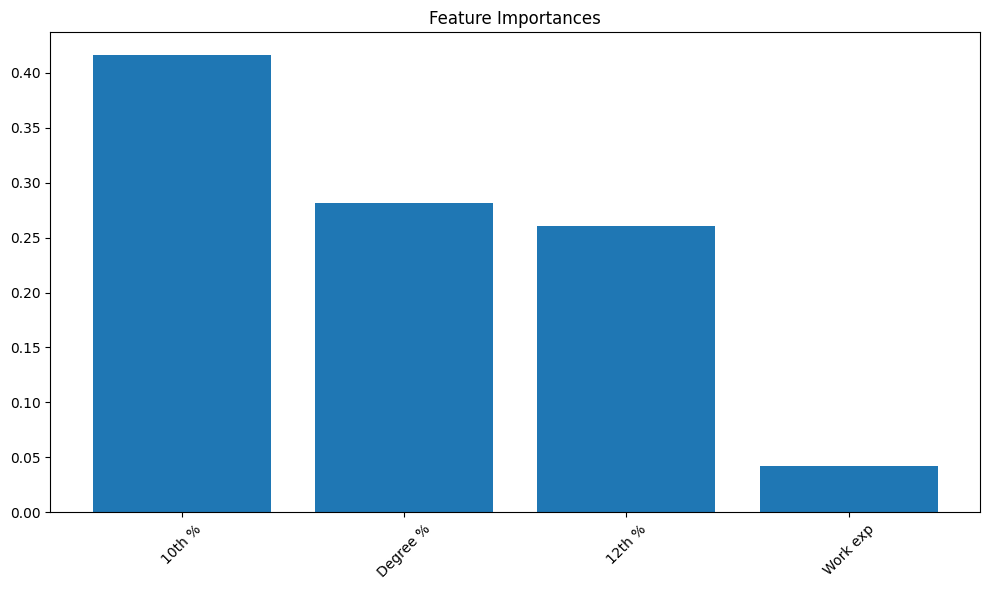

In [49]:
importances = best_rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 6  6]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43

Accuracy: 0.7906976744186046


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.79      0.87      0.83        31

    accuracy                           0.74        43
   macro avg       0.67      0.64      0.65        43
weighted avg       0.73      0.74      0.73        43



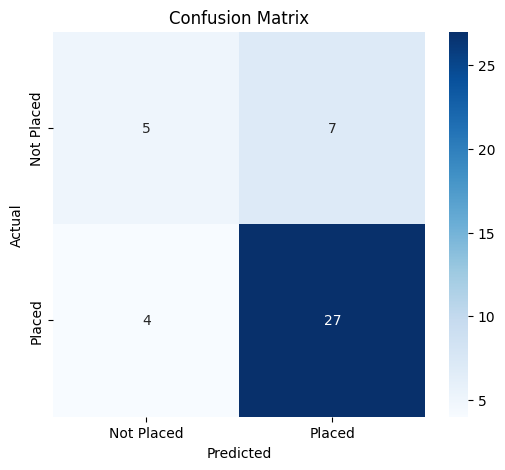

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


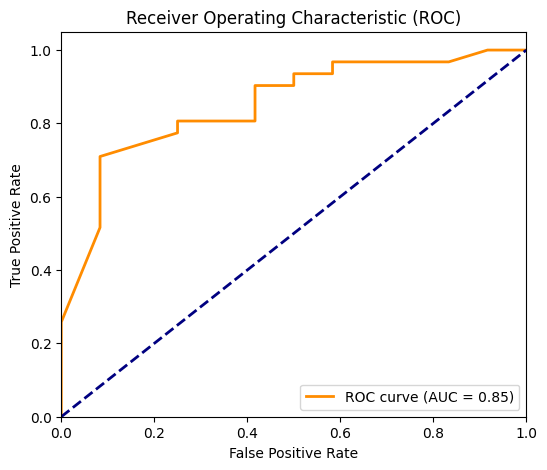

In [48]:
from sklearn.metrics import roc_curve, auc

y_proba = best_rf.predict_proba(X_test)[:,1]  # probability estimates for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
